In [1]:
import pandas as pd

df = pd.read_csv('c:/data/game/appstore.csv')

In [2]:
# 'Name', 게임명 'User Rating Count', 총별점(0.0~5.0) 'Price', 가격
# 'In-app Purchases', 인앱결제 'Description', 게임설명 'Age Rating', 사용연령(4,9,12,17)
# 'Languages', 언어, 'Original Release Date', 출시일, 'Current Version Release Date' 최신버전



df = df.drop(['Name', 'Average User Rating(1)','Description','URL', 'ID','Subtitle', 'Icon URL',
'Developer', 'Size', 'Primary Genre', 'Genres'], axis=1)


In [3]:
df['Age Rating'].value_counts()

4+     11769
9+      2470
12+     2046
17+      662
Name: Age Rating, dtype: int64

In [4]:
#원핫 인코딩(연령대)
df = pd.get_dummies(df, columns=['Age Rating'], prefix='Age Rating')

In [5]:
#NUll값을 0으로 대체
df = df.fillna(0)

In [6]:
#제공언어를 개수로 변환 후, 원래 테이블값과 치환
lan_list = []

lang=df['Languages']

#제공 언어를 개수로 변환
for a in lang.values:
    b = a.split(', ')
    lan_list.append(len(b))
    
#lan_list    
#기존 df의 값을 치환
df['Languages'] = lan_list

In [7]:
#인앱결제의 총 가격(가격이 클수록, 컨텐츠가 다양함)
total = []
In_app=df['In-app Purchases']
contents = In_app.values.tolist()

#인앱결제 상품 개수를 더함
for i in contents:
    if i != 0:
        total.append(len(str(i).split()))
    else:
        total.append(i)

In [8]:
df['In-app Purchases'] = total

In [9]:
from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()
print('present:', now.day,'/', now.month,'/', now.year)

#데이터프레임 형식으로 형식을 편집
type(now)


present: 17 / 1 / 2022


datetime.datetime

In [10]:
#게임 출시일이 기록된 리스트
month = []
ORD=df['Original Release Date']
contents = ORD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

month[:5]

[datetime.datetime(2016, 10, 15, 0, 0),
 datetime.datetime(2017, 4, 18, 0, 0),
 datetime.datetime(2018, 12, 18, 0, 0),
 datetime.datetime(2017, 6, 29, 0, 0),
 datetime.datetime(2017, 8, 15, 0, 0)]

In [11]:
from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    #최근 업데이트 개월수는 적을수록 더 많은 업데이트를 했음을 암시
    #따라서 최근 10년 - 마지막 업데이트 날을 계산해 역수로 표현
    result = 120 - (12*delta.years + delta.months) # 10년(120개월) - (연*12 + 잔여개월수) = 최근 업데이트 개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Original Release Date'] = month2
    

In [12]:
from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()
print('present:', now.day,'/', now.month,'/', now.year)

#데이터프레임 형식으로 형식을 편집
type(now)


present: 17 / 1 / 2022


datetime.datetime

In [13]:
#게임 업데이트일이 기록된 리스트
month = []
CVRD=df['Current Version Release Date']
contents = CVRD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)


In [14]:
from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Current Version Release Date'] = month2
    

In [15]:
df.head()

,Average User Rating,Result,User Rating Count,Price,In-app Purchases,Languages,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
0,2.0,0,0.0,0.0,0,2,57,46,0,0,1,0
1,4.0,1,42.0,0.0,4,2,64,54,1,0,0,0
2,4.5,1,9146.0,0.0,9,8,84,29,0,0,1,0
3,4.5,1,595.0,0.0,7,11,66,54,0,0,0,1
4,4.5,1,1930.0,0.0,2,13,67,30,0,0,1,0


In [16]:
#게임 평균 별점 예측
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
#유저가 부여한 평균 별점을 기준으로 한 평균값들
df.groupby('Result').mean()

,Average User Rating,User Rating Count,Price,In-app Purchases,Languages,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
Result,,,,,,,,,,,
0,2.176514,273.138104,0.922147,1.128973,2.899385,52.897191,57.659614,0.087621,0.040825,0.750922,0.120632
1,4.434047,3936.495771,0.587213,3.911643,3.999460,44.223142,53.271549,0.188591,0.035451,0.578730,0.197229


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating count\n(0:bad | 1:good)')

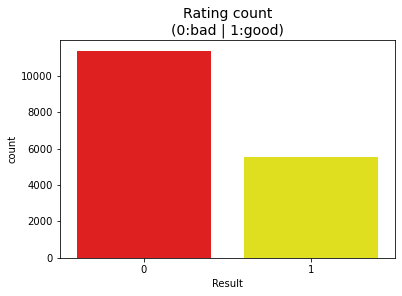

In [18]:
#별점 분포 확인
import seaborn as sns

colors = ['red', 'yellow']
sns.countplot('Result', data=df, palette=colors)
plt.title('Rating count\n(0:bad | 1:good)', fontsize=14)

In [19]:
df.columns

Index(['Average User Rating', 'Result', 'User Rating Count', 'Price',
       'In-app Purchases', 'Languages', 'Original Release Date',
       'Current Version Release Date', 'Age Rating_12+', 'Age Rating_17+',
       'Age Rating_4+', 'Age Rating_9+'],
      dtype='object')

In [20]:
# three class에서 기준조정 또는 three class에서 two class로 다운
# 파생변수 추가수집

In [21]:
train_cols = df.columns[2:]
X = df[train_cols]
y = df['Result']

In [22]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp, y_samp], axis=1)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating count\n(0:bad | 1:good)')

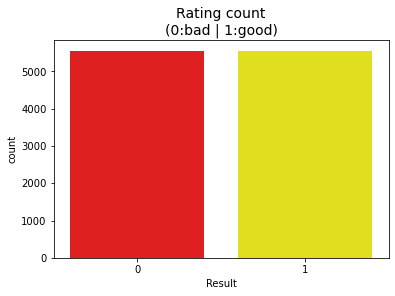

In [23]:
#별점 분포 확인
import seaborn as sns

colors = ['red', 'yellow']
sns.countplot('Result', data=df2, palette=colors)
plt.title('Rating count\n(0:bad | 1:good)', fontsize=14)

In [24]:
df2['Result'].value_counts()

0    5557
1    5557
Name: Result, dtype: int64

In [25]:
train_cols = df.columns[2:]
X = df2[train_cols]
y = df2['Result']

In [26]:
#오류
#import statsmodels.api as sm
#model = sm.Logit(y,X)
#result = model.fit()
#print(result.summary2())

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])

params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.662221483819756


In [28]:
#알고리즘별 정확도를 저장할 리스트
scores=[]

In [29]:
scores.append(grid.best_score_)
scores

[0.662221483819756]

In [30]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier, export_graphviz
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)) #가지치기의 max_depth=3
}

#트리 모델 생성
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.8139372251029634


In [31]:
scores.append(grid.best_score_)
scores

[0.662221483819756, 0.8139372251029634]

In [32]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10)), #생성할 나무의 개수
}

#결과
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 80}
0.8887000376002309


In [33]:
scores.append(grid.best_score_)
scores

[0.662221483819756, 0.8139372251029634, 0.8887000376002309]

In [34]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

params = {
    'clf__n_neighbors': list(range(1,11)), #최근접 이웃의 수
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 6}
0.5579409841544661


In [35]:
scores.append(grid.best_score_)
scores

[0.662221483819756, 0.8139372251029634, 0.8887000376002309, 0.5579409841544661]

In [36]:
#인공신경망
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=1000)),
])

params = {
    'clf__hidden_layer_sizes': [(50,),(100,)], #은닉층 수 [(50,),(100,),(50,50),(100,100)]
    #'clf__activation': ['tanh', 'relu'], #활성화 함수
    #'clf__alpha': [0.001, 0.01, 0.1] #실제값과 예측값 사이의 오차에 대한 패널티(과할 경우 과적합, 적을 경우 과소적합)
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__hidden_layer_sizes': (50,)}
0.5294207718443253


In [37]:
scores.append(grid.best_score_)
scores

[0.662221483819756,
 0.8139372251029634,
 0.8887000376002309,
 0.5579409841544661,
 0.5294207718443253]

In [38]:
#SVM
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])

params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100, 'clf__gamma': 0.0001}
0.6674399003545304


In [39]:
scores.append(grid.best_score_)
scores

[0.662221483819756,
 0.8139372251029634,
 0.8887000376002309,
 0.5579409841544661,
 0.5294207718443253,
 0.6674399003545304]

['LOGIT', 'TREE', 'RF', 'KNN', 'ANN', 'SVM']
[0.66222148 0.81393723 0.88870004 0.55794098 0.52942077 0.6674399 ]
best algorithm: RF
best accuracy: 0.8887000376002309


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

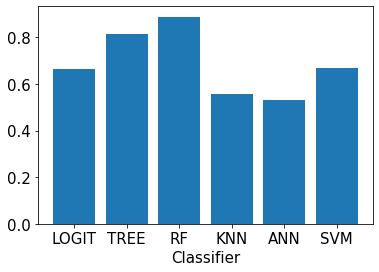

In [40]:
#알고리즘별 예측도 그래프
import numpy as np
methods = ['LOGIT', 'TREE', 'RF', 'KNN', 'ANN', 'SVM']

scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)

print(methods) # 사용된 알고리즘
print(scores_arr) # 가장 높은 정확도
print('best algorithm:', methods[idx])
print('best accuracy:', max_rate )

plt.rcParams['font.size']=15
plt.bar(methods, scores_arr)
plt.xlabel('Classifier')
plt.ylabel

#결론: 렌덤포레스트의 정확도가 가장 높다

In [44]:
#최적의 분류 알고리즘(의사결정나무, 랜덤 포레스트)를 이용해 값 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#트리모델
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))
#과적합

train: 0.998312900686087
test: 0.8695456590193432


In [51]:
#max_depth 가지치기
model = DecisionTreeClassifier(max_depth=5, random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [52]:
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))

train: 0.9216061185468452
test: 0.9095816464237517


In [53]:
#오분류표
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 952,  190],
       [  11, 1070]], dtype=int64)

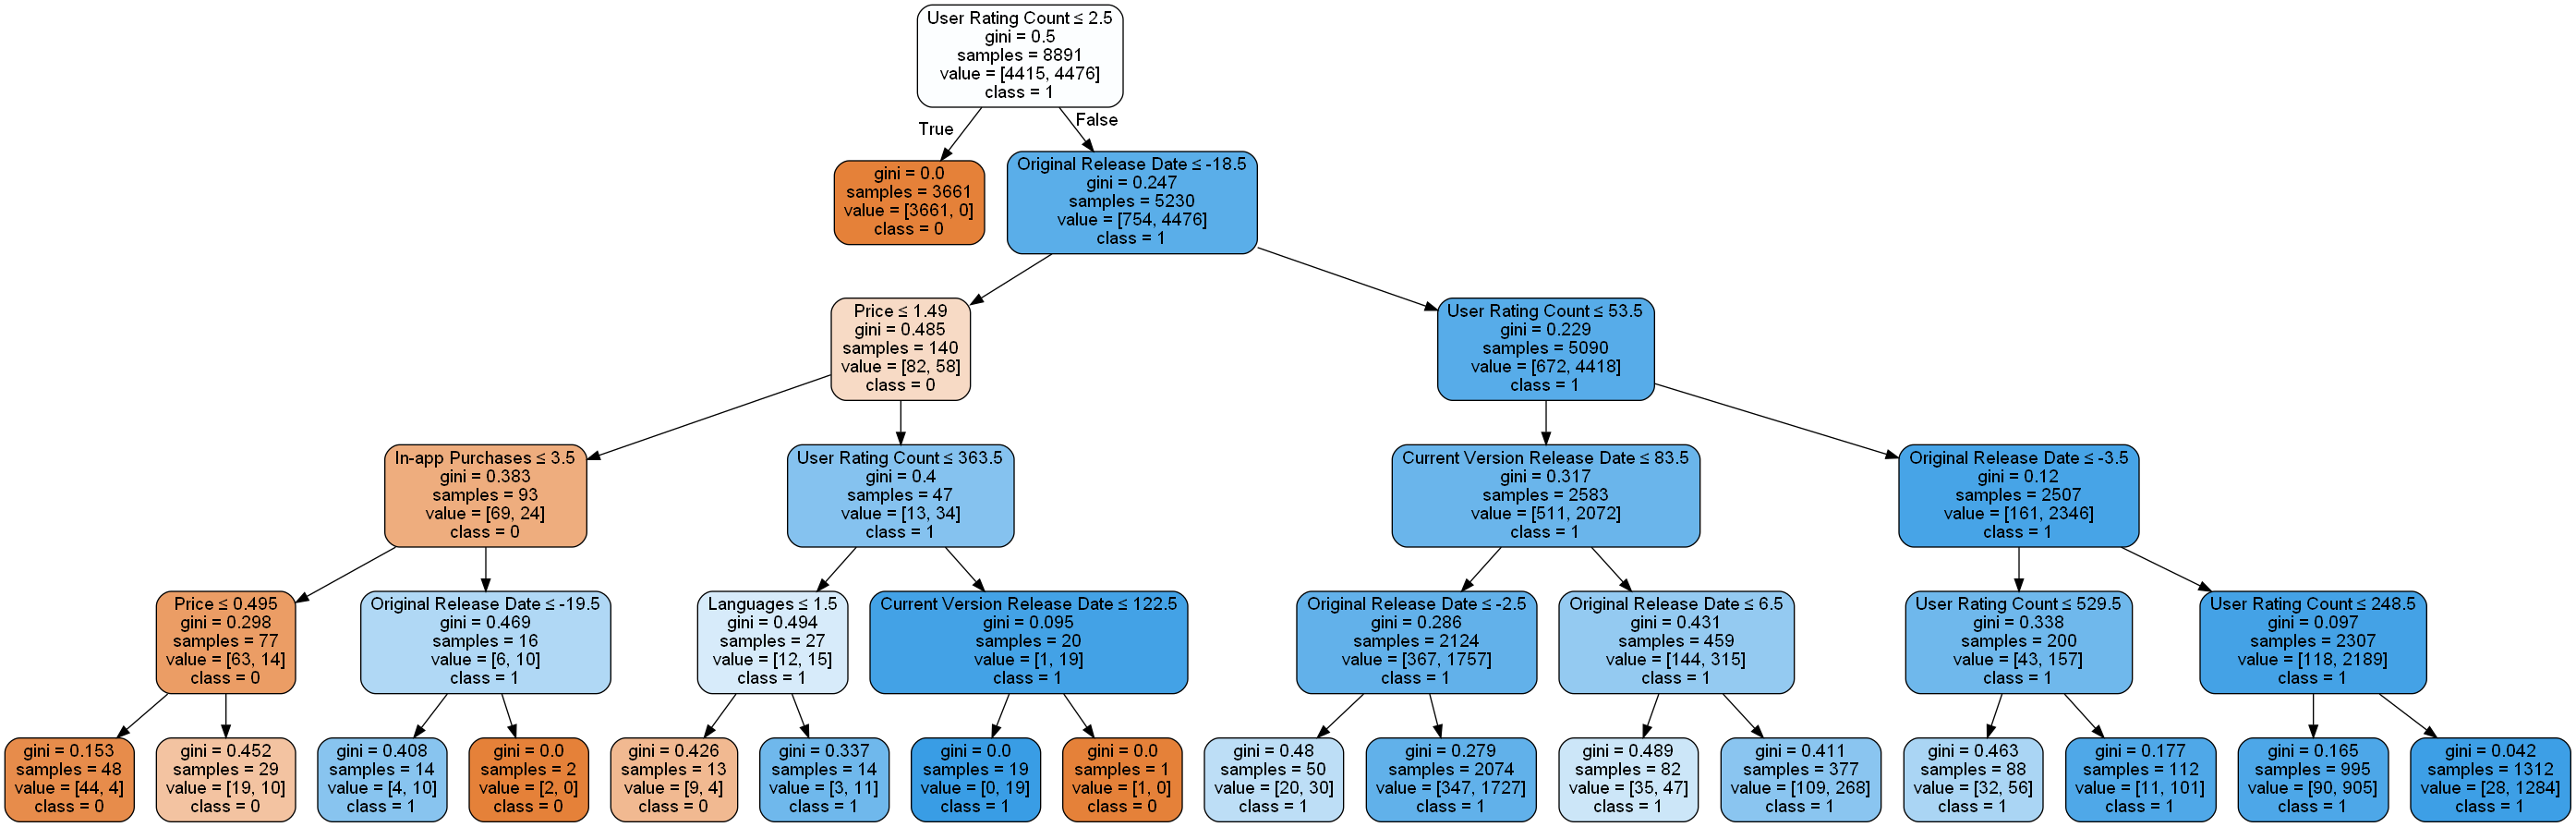

In [54]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=train_cols,
class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

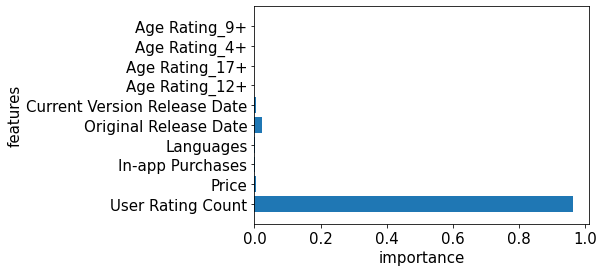

In [55]:
#특성중요도
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel('importance')
    plt.ylabel('features')
    plt.ylim(-1, n_features)

plot_tree(model)

#유저가 부여한 총별점이 가장 중요한 요소로 작용